In [5]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors
from pandas.plotting import scatter_matrix
from scipy.stats import gaussian_kde
from pandas.plotting import parallel_coordinates
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn import manifold
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
matplotlib.style.use('ggplot')

In [6]:
ds=pd.read_csv('Prostate_Cancer.csv')

In [7]:
ds

,id,diagnosis,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,1,M,23,12,151,954,0.143,0.278,0.242,0.079
1,2,B,9,13,133,1326,0.143,0.079,0.181,0.057
2,3,M,21,27,130,1203,0.125,0.160,0.207,0.060
3,4,M,14,16,78,386,0.070,0.284,0.260,0.097
4,5,M,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...,...,...
95,96,M,23,16,132,1264,0.091,0.131,0.210,0.056
96,97,B,22,14,78,451,0.105,0.071,0.190,0.066
97,98,B,19,27,62,295,0.102,0.053,0.135,0.069
98,99,B,21,24,74,413,0.090,0.075,0.162,0.066


# Data Exploration

In [8]:
print(" Diagnosis (M = malignant, B = benign \n Radius ( distances from center to points on the perimeter) \n Smoothness (local variation in radius lengths)")


 Diagnosis (M = malignant, B = benign 
 Radius ( distances from center to points on the perimeter) 
 Smoothness (local variation in radius lengths)


# Checke missing values

In [9]:
print('Column Name     Missing Value:')
ds.isnull().sum()

Column Name     Missing Value:


id                   0
diagnosis            0
radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
symmetry             0
fractal_dimension    0
dtype: int64

In [10]:
print('Column Name        Data Type')
print(ds.dtypes)

Column Name        Data Type
id                     int64
diagnosis             object
radius                 int64
texture                int64
perimeter              int64
area                   int64
smoothness           float64
compactness          float64
symmetry             float64
fractal_dimension    float64
dtype: object


# Data  Visualization

M    62
B    38
Name: diagnosis, dtype: int64


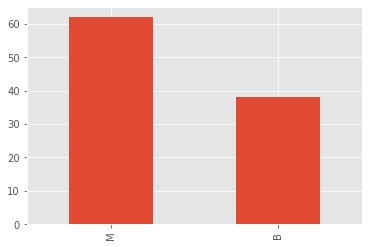

In [11]:
ds['diagnosis'].value_counts().plot(kind='bar')
print(ds['diagnosis'].value_counts())
plt.show()

In [12]:
ds.describe()

,id,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,16.850000,18.230000,96.780000,702.880000,0.102730,0.126700,0.193170,0.064690
std,29.011492,4.879094,5.192954,23.676089,319.710895,0.014642,0.061144,0.030785,0.008151
min,1.000000,9.000000,11.000000,52.000000,202.000000,0.070000,0.038000,0.135000,0.053000
25%,25.750000,12.000000,14.000000,82.500000,476.750000,0.093500,0.080500,0.172000,0.059000
50%,50.500000,17.000000,17.500000,94.000000,644.000000,0.102000,0.118500,0.190000,0.063000
75%,75.250000,21.000000,22.250000,114.250000,917.000000,0.112000,0.157000,0.209000,0.069000
max,100.000000,25.000000,27.000000,172.000000,1878.000000,0.143000,0.345000,0.304000,0.097000


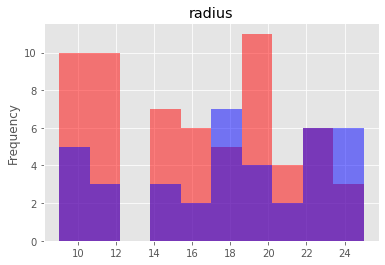

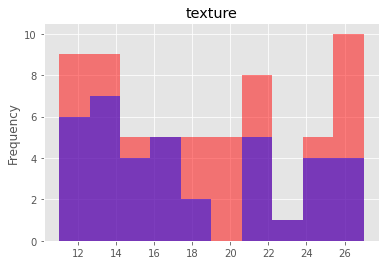

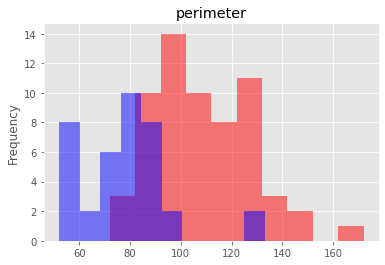

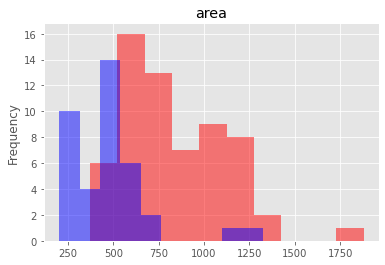

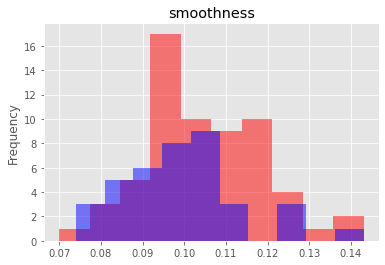

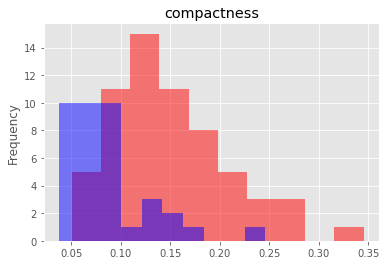

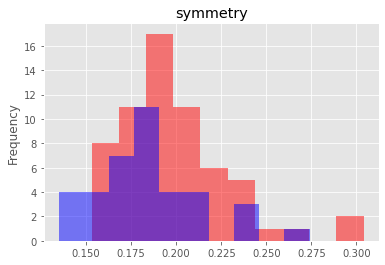

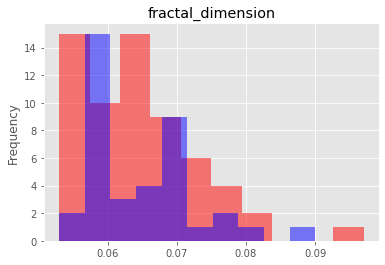

In [13]:
for i in('radius','texture','perimeter','area','smoothness','compactness','symmetry','fractal_dimension'):
  plt.figure()
  ds[i][ds['diagnosis'] =='M'].plot.hist(alpha=0.5,color='red',title=i)
  ds[i][ds['diagnosis'] =='B'].plot.hist(alpha=0.5,color='blue')
  plt.show()

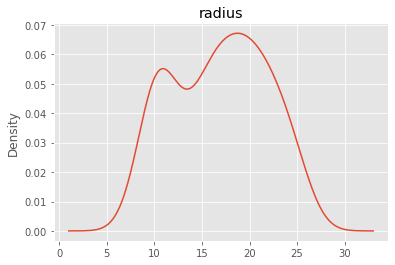

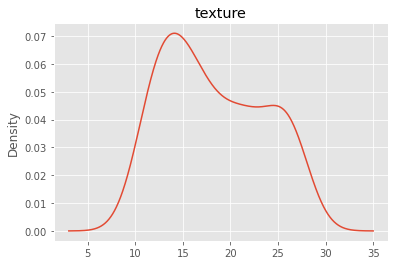

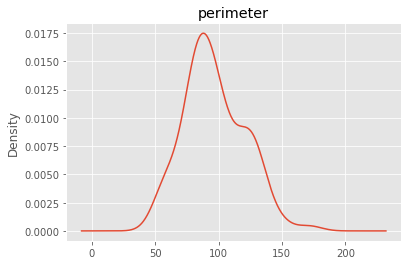

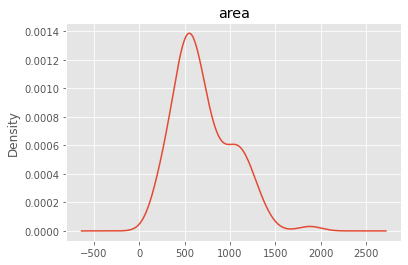

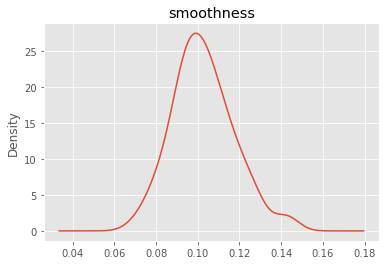

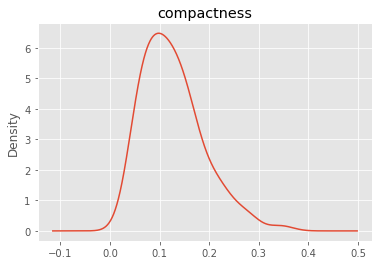

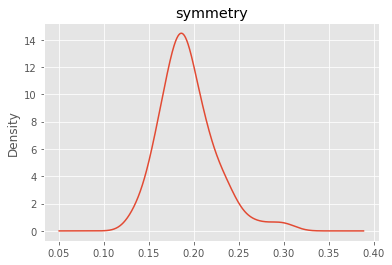

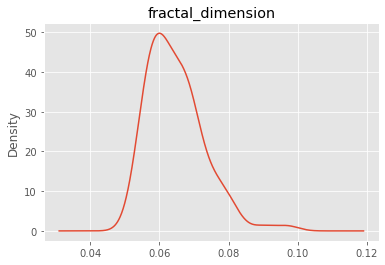

In [14]:
for i in('radius','texture','perimeter','area','smoothness','compactness','symmetry','fractal_dimension'):
  ds[i].plot.kde(title=i)
  plt.show()

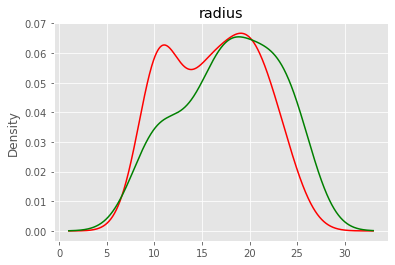

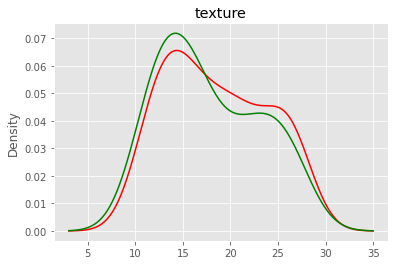

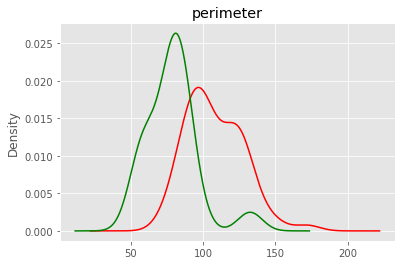

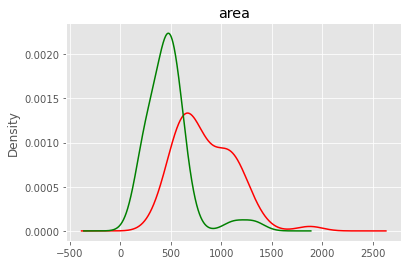

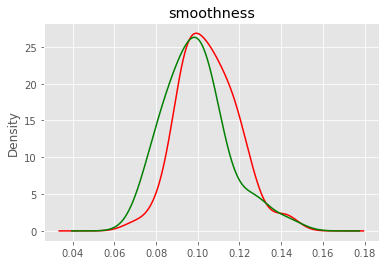

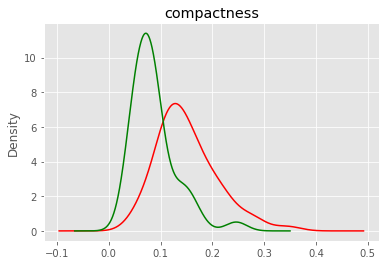

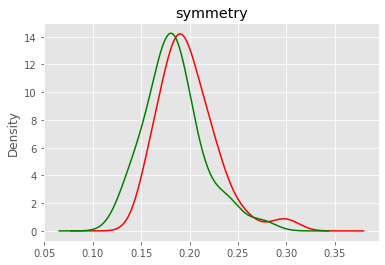

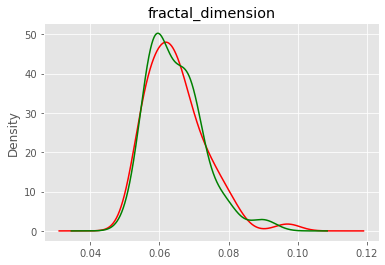

In [15]:
for i in('radius','texture','perimeter','area','smoothness','compactness','symmetry','fractal_dimension'):
  ds[i][ds['diagnosis']=='M'].plot.kde(title =i, c='r')
  ds[i][ds['diagnosis']=='B'].plot.kde(title =i, c='g')
  
  plt.show()

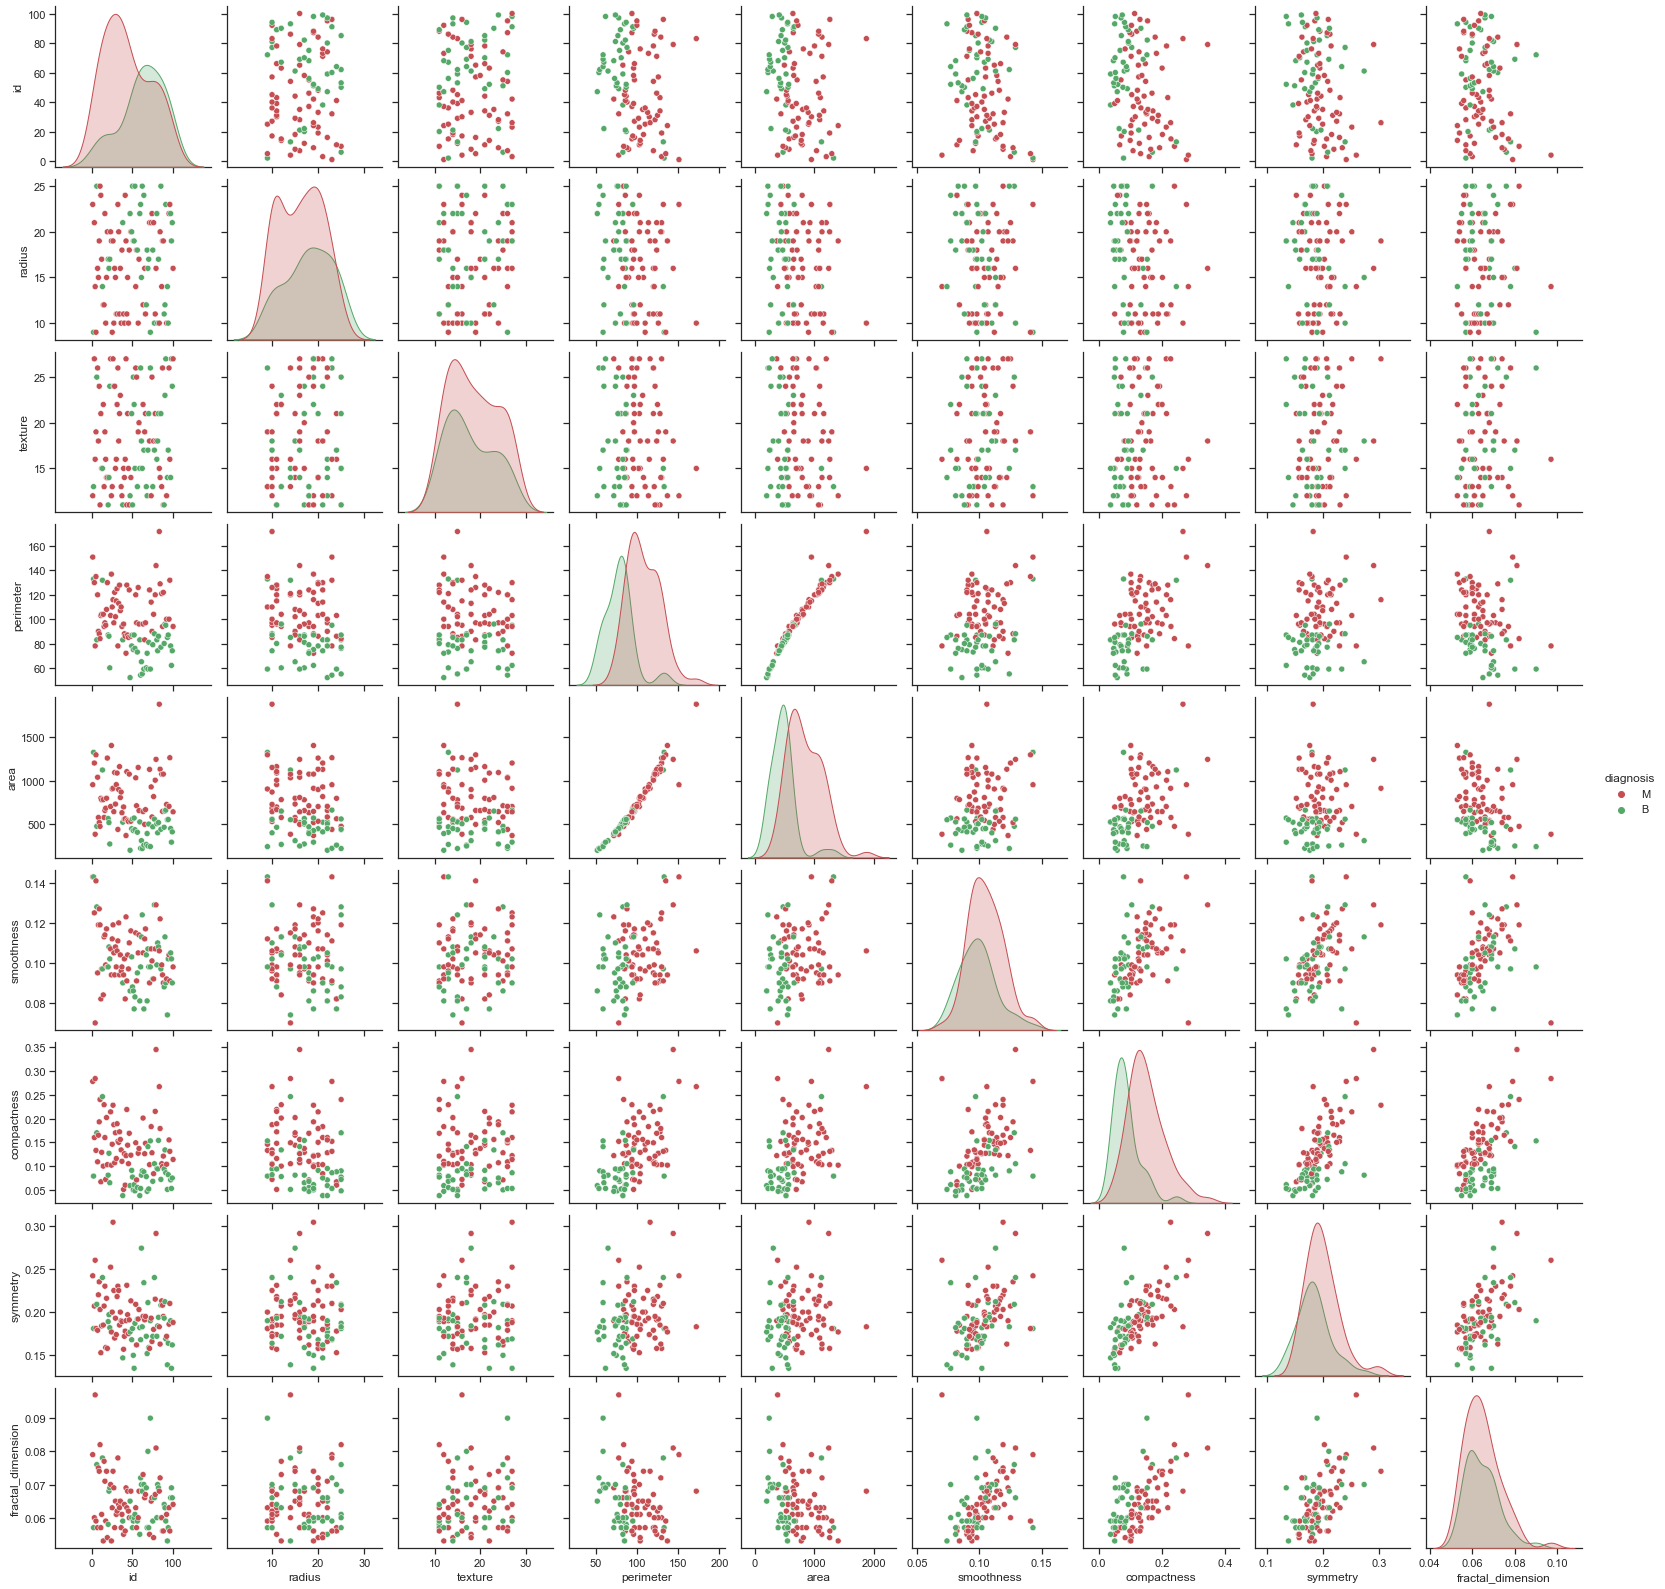

In [16]:
import seaborn as sns
sns.set(style="ticks")
sns.pairplot(ds,palette=('r','g'),hue='diagnosis')
plt.show()

# One-Hot Encode

In [17]:
dumm=pd.get_dummies(ds['diagnosis'],drop_first=True)

In [18]:
x=ds.iloc[:,2:]
y=dumm

In [19]:
x

,radius,texture,perimeter,area,smoothness,compactness,symmetry,fractal_dimension
0,23,12,151,954,0.143,0.278,0.242,0.079
1,9,13,133,1326,0.143,0.079,0.181,0.057
2,21,27,130,1203,0.125,0.160,0.207,0.060
3,14,16,78,386,0.070,0.284,0.260,0.097
4,9,19,135,1297,0.141,0.133,0.181,0.059
...,...,...,...,...,...,...,...,...
95,23,16,132,1264,0.091,0.131,0.210,0.056
96,22,14,78,451,0.105,0.071,0.190,0.066
97,19,27,62,295,0.102,0.053,0.135,0.069
98,21,24,74,413,0.090,0.075,0.162,0.066


In [20]:
y

,M
0,1
1,0
2,1
3,1
4,1
...,...
95,1
96,0
97,0
98,0


# Data Tarin Test

In [21]:
from sklearn.model_selection import  train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=12)

In [22]:
print(x_train.var())

radius                   26.070600
texture                  26.791097
perimeter               610.526708
area                 111518.308282
smoothness                0.000233
compactness               0.003942
symmetry                  0.000984
fractal_dimension         0.000062
dtype: float64


In [23]:
scale=StandardScaler(copy=True,with_mean=True,with_std=True)
scale.fit(x_train)

x_train_std=scale.transform(x_train)
x_test_std=scale.transform(x_test)

In [24]:
print(x_train_std.var())

1.0


In [25]:
pca1=PCA(n_components=7,svd_solver='randomized')
pca1.fit(x_train_std)
x_train_std_pca=pca1.transform(x_train_std)
x_test_std_pca=pca1.transform(x_test_std)

# SVM ALGORITHM

In [26]:
from sklearn.svm import SVC

In [27]:
SVCmodel=SVC(C=0.9,gamma='auto',kernel='rbf')
SVCmodel=SVCmodel.fit(x_train_std_pca,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [28]:
print("accuracy:",SVCmodel.score(x_test_std_pca,y_test))


accuracy: 0.8


In [6]:
from sklearn.model_selection import cross_validate as cval
from sklearn.model_selection import cross_val_score as cval
cval.cross_val_score(SVCmodel,x_train_std_pca,y_train,cv=10)

AttributeError: 'function' object has no attribute 'cross_val_score'

# Linear Regression Algorithm

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
reg=LinearRegression()

In [32]:
reg=reg.fit(x_train,y_train)

In [33]:

print("accuracy:",reg.score(x_test,y_test))

accuracy: 0.04180573740548765


# KNN Algorithm

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [34]:
knei=KNeighborsClassifier(n_neighbors=10)

In [35]:
knei=knei.fit(x_train_std_pca,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [36]:
print("accuracy:",knei.score(x_test_std_pca,y_test))


accuracy: 0.8


# Naive Bayes classifier

In [37]:
from sklearn.naive_bayes import GaussianNB

In [38]:
NaivB = GaussianNB()

In [39]:
NaivB.fit(x_train_std_pca,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GaussianNB()

In [40]:
print("accuracy:",NaivB.score(x_test_std_pca,y_test))


accuracy: 0.7666666666666667


# Random Forest Classifier Algoriyhm

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
Rclf=RandomForestClassifier()

In [43]:
Rclf.fit(x_train_std_pca,y_train)

<ipython-input-43-84b94efbd3cd>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Rclf.fit(x_train_std_pca,y_train)


RandomForestClassifier()

In [45]:
print("accuracy:",Rclf.score(x_test_std_pca,y_test))


accuracy: 0.9
